### **EP4130 Project Code**

### **P. Naga Hari Teja - CS19BTECH11021**

### **Vemulapalli Aditya - CS19BTECH11025**

### **Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize

### **Measurements of Newton’s Gravitational Constant**

In [2]:
Ggrad = (6.676e-11-6.672e-11)/(372.31-96.28)
UWup = 6.672e-11 + Ggrad*(249.17-96.28)
UWuperr = (316.94-249.17)*Ggrad

posgrad = (2015.-1981.)/(674.04-92.79)
positions = np.array([108.17, 
                      365.87, 
                      388.94, 
                      425.48, 
                      437.50, 
                      452.08, 
                      475.48, 
                      492.79, 
                      528.44, 
                      552.61, 
                      574.52, 
                      649.52])

positions = positions-92.79

In [3]:
Gs = np.array([6.67248e-11, 
               6.67398e-11, 
               6.67228e-11, 
               6.674255e-11, 
               6.67559e-11,
               UWup, 
               6.67387e-11, 
               6.67234e-11, 
               6.674252e-11, 
               6.67554e-11, 
               6.67349e-11, 
               6.67191e-11])

errs = np.array([0.00043e-11, 
                 0.00070e-11, 
                 0.00087e-11, 
                 0.000092e-11, 
                 0.00027e-11, 
                 UWuperr, 
                 0.00027e-11, 
                 0.00014e-11, 
                 0.000120e-11, 
                 0.00016e-11, 
                 0.00018e-11, 
                 0.00099e-11])

years = positions*posgrad

In [4]:
"""
Measurement errors on experiment times
- error of 3 months on all data points except JILA-10 and LENS-14
- error of one week on JILA-10 and LENS-14
"""
timeserrs = (3./12.)*np.ones_like(errs)
timeserrs[7] = (1./52.)
timeserrs[11] = (1./52.)

In [5]:
"""
Anderson et al best fit values
"""
Pbf = 5.899
Abf = 1.619e-14
tepochn = (420.83-92.79)*posgrad
phi0bf = 0.
muGbf = 6.673899e-11

In [6]:
def pmodel(A, P, phi0, t0, muG, ts):
    m = A*np.sin(phi0 + 2.*np.pi*(ts-t0)/P) + muG
    return m

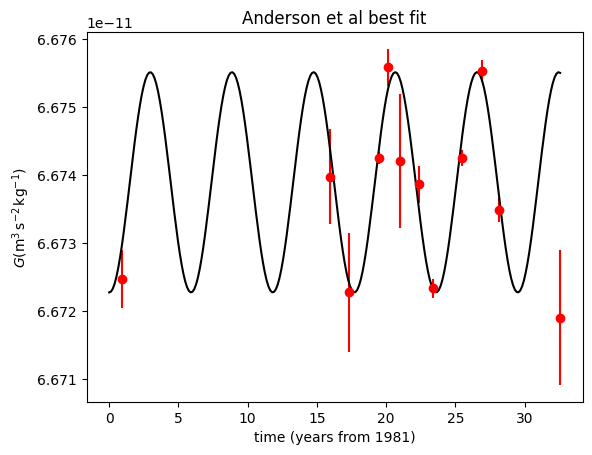

In [7]:
plt.errorbar(years, Gs, yerr=errs, fmt='ro')
plt.xlabel('time (years from 1981)')
plt.ylabel(r'$G (\mathrm{m}^3\,\mathrm{s}^{-2}\,\mathrm{kg}^{-1}$)')
plt.title(r'Anderson et al best fit')
yts = np.array([np.linspace(0., years[-1], 250)])
smodel = pmodel(Abf, Pbf, phi0bf, tepochn, muGbf, yts.T)
plt.plot(yts.T, smodel, 'k')
plt.show()

In [8]:
def chi2_prob(chi2_val, dof):
    return stats.chi2(dof).pdf(chi2_val)

In [9]:
hypothesis = ["H1", "H2", "H3", "H4"]
theta = {}
dof = {}
chi2_val = {}
chi2_dof_val = {}
chi2_prob_val = {}

### **Analysis without errors in measurement times**

#### **H1**

In [10]:
def neg_ln_likelihood_H1(theta, x, y, sigma_y):
    muG = theta
    H1 = muG
    dy = y - H1
    return np.sum((dy**2)/(sigma_y**2))

In [11]:
def chi2_H1(theta, x, y, sigma_y):
    muG = theta
    H1 = muG
    dy = y - H1
    return np.sum((dy**2)/(sigma_y**2))

In [12]:
theta['H1'] = optimize.fmin(
    neg_ln_likelihood_H1, 
    x0=[0], 
    args=(years, Gs, errs),
    disp=False
)

In [13]:
print("Best-fit values")
print("---------------")
print(f"muG : {theta['H1'][0]}")

Best-fit values
---------------
muG : 6.674043362409066e-11


In [14]:
dof['H1']  = len(years) - len(theta['H1'])
chi2_val['H1']  = chi2_H1(theta['H1'], years, Gs, errs)
chi2_dof_val['H1'] = chi2_val['H1'] / dof['H1']
chi2_prob_val['H1'] =  chi2_prob(chi2_val['H1'], dof['H1'])

In [15]:
print(f'χ2 / DOF : {chi2_dof_val["H1"]}')
print(f'P(χ2, 𝛎) : {chi2_prob_val["H1"]}')

χ2 / DOF : 28.048211940669216
P(χ2, 𝛎) : 6.77342693529661e-60


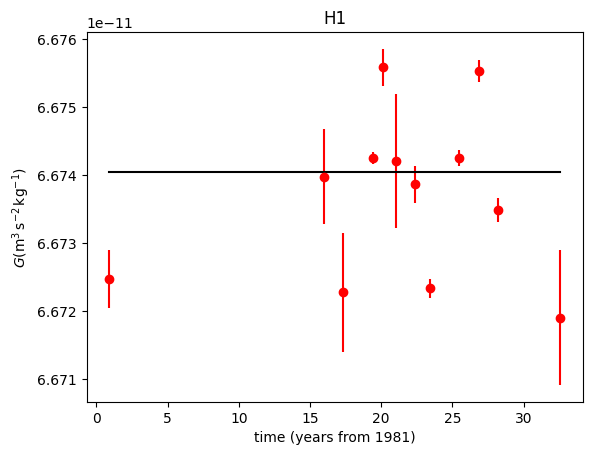

In [16]:
plt.errorbar(years, Gs, yerr=errs, fmt='ro')
plt.xlabel('time (years from 1981)')
plt.ylabel(r'$G (\mathrm{m}^3\,\mathrm{s}^{-2}\,\mathrm{kg}^{-1}$)')
plt.title(r'H1')
yts = np.array([np.linspace(0., years[-1], 250)])
smodel = pmodel(Abf, Pbf, phi0bf, tepochn, muGbf, yts.T)
plt.plot(years, np.ones(len(years))*theta['H1'][0], c='k')
plt.show()

#### **H2**

In [17]:
def neg_ln_likelihood_H2(theta, x, y, sigma_y):
    muG, sigma_sys = theta
    H2 = muG
    dy = y - H2
    return np.sum(np.log(sigma_y**2 + sigma_sys**2)) + np.sum((dy**2)/(sigma_y**2 + sigma_sys**2))

In [18]:
def chi2_H2(theta, x, y, sigma_y):
    muG, sigma_sys = theta
    H2 = muG
    dy = y - H2
    return np.sum((dy**2)/(sigma_y**2 + sigma_sys**2))

In [19]:
theta['H2'] = optimize.fmin(
    neg_ln_likelihood_H2, 
    x0=[0, 0], 
    args=(years, Gs, errs),
    disp=False
)

In [20]:
print("Best-fit values")
print("---------------")
print(f"muG : {theta['H2'][0]}")
print(f"sigma_sys : {theta['H2'][1]}")

Best-fit values
---------------
muG : 6.67378791061064e-11
sigma_sys : 1.0710860422004413e-14


In [21]:
dof['H2']  = len(years) - len(theta['H2'])
chi2_val['H2']  = chi2_H2(theta['H2'], years, Gs, errs)
chi2_dof_val['H2'] = chi2_val['H2'] / dof['H2']
chi2_prob_val['H2'] =  chi2_prob(chi2_val['H2'], dof['H2'])

In [22]:
print(f'χ2 / DOF : {chi2_dof_val["H2"]}')
print(f'P(χ2, 𝛎) : {chi2_prob_val["H2"]}')

χ2 / DOF : 1.1775905910042819
P(χ2, 𝛎) : 0.06942415618137185


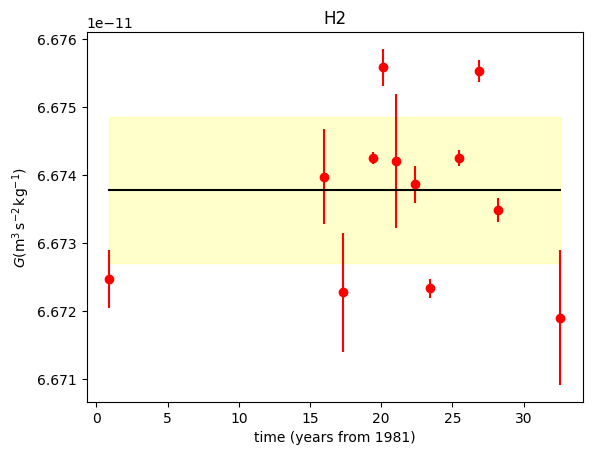

In [23]:
plt.errorbar(years, Gs, yerr=errs, fmt='ro')
plt.xlabel('time (years from 1981)')
plt.ylabel(r'$G (\mathrm{m}^3\,\mathrm{s}^{-2}\,\mathrm{kg}^{-1}$)')
plt.title(r'H2')
yts = np.array([np.linspace(0., years[-1], 250)])
smodel = pmodel(Abf, Pbf, phi0bf, tepochn, muGbf, yts.T)
plt.plot(years, np.ones(len(years))*theta['H2'][0], c='k')
plt.fill_between(years, np.ones(len(years))*(theta['H2'][0]+theta['H2'][1]),
                 np.ones(len(years))*(theta['H2'][0]-theta['H2'][1]),
                 color='yellow', alpha=.2)
plt.show()

#### **H3**

In [24]:
def model_H3(theta, x):
    A, P, phi0, muG = theta
    return A*np.sin(phi0 + 2.*np.pi*(x-tepochn)/P) + muG

In [25]:
def neg_ln_likelihood_H3(theta, x, y, sigma_y):
    A, P, phi0, muG = theta
    H3 = A*np.sin(phi0 + 2.*np.pi*(x-tepochn)/P) + muG
    dy = y - H3
    return np.sum((dy**2)/(sigma_y**2))

In [26]:
def chi2_H3(theta, x, y, sigma_y):
    A, P, phi0, muG = theta
    H3 = A*np.sin(phi0 + 2.*np.pi*(x-tepochn)/P) + muG
    dy = y - H3
    return np.sum((dy**2)/(sigma_y**2))

In [27]:
theta['H3'] = optimize.fmin(
    neg_ln_likelihood_H3, 
    x0=[Abf, Pbf, phi0bf, muGbf], 
    args=(years, Gs, errs),
    disp=False
)

In [28]:
print("Best-fit values")
print("---------------")
print(f"A : {theta['H3'][0]}")
print(f"P : {theta['H3'][1]}")
print(f"phi0 : {theta['H3'][2]}")
print(f"muG : {theta['H3'][3]}")

Best-fit values
---------------
A : 1.6361506842925137e-14
P : 5.900848456864138
phi0 : -0.07010869690977443
muG : 6.67384198730647e-11


In [29]:
dof['H3']  = len(years) - len(theta['H3'])
chi2_val['H3']  = chi2_H3(theta['H3'], years, Gs, errs)
chi2_dof_val['H3'] = chi2_val['H3'] / dof['H3']
chi2_prob_val['H3'] =  chi2_prob(chi2_val['H3'], dof['H3'])

In [30]:
print(f'χ2 / DOF : {chi2_dof_val["H3"]}')
print(f'P(χ2, 𝛎) : {chi2_prob_val["H3"]}')

χ2 / DOF : 2.9342789944349104
P(χ2, 𝛎) : 0.0010768079154666018


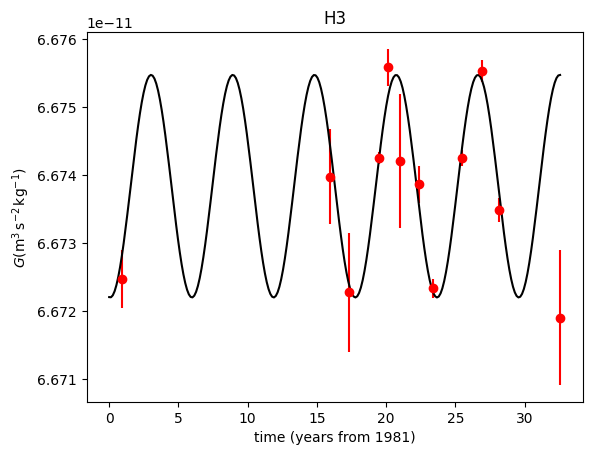

In [31]:
plt.errorbar(years, Gs, yerr=errs, fmt='ro')
plt.xlabel('time (years from 1981)')
plt.ylabel(r'$G (\mathrm{m}^3\,\mathrm{s}^{-2}\,\mathrm{kg}^{-1}$)')
plt.title(r'H3')
yts = np.array([np.linspace(0., years[-1], 250)])
smodel = pmodel(Abf, Pbf, phi0bf, tepochn, muGbf, yts.T)
plt.plot(yts.T, model_H3(theta['H3'], yts.T), c='k')
plt.show()

#### **H4**

In [32]:
def model_H4(theta, x):
    A, P, phi0, muG = theta
    return A*np.sin(phi0 + 2.*np.pi*(x-tepochn)/P) + muG

In [33]:
def neg_ln_likelihood_H4(theta, x, y, sigma_y):
    A, P, phi0, muG, sigma_sys = theta
    H4 = A*np.sin(phi0 + 2.*np.pi*(x-tepochn)/P) + muG
    dy = y - H4
    return np.sum(np.log(sigma_y**2 + sigma_sys**2)) + np.sum((dy**2)/(sigma_y**2 + sigma_sys**2))

In [34]:
def chi2_H4(theta, x, y, sigma_y):
    A, P, phi0, muG, sigma_sys = theta
    H4 = A*np.sin(phi0 + 2.*np.pi*(x-tepochn)/P) + muG
    dy = y - H4
    return np.sum((dy**2)/(sigma_y**2 + sigma_sys**2))

In [35]:
theta['H4'] = optimize.fmin(
    neg_ln_likelihood_H4, 
    x0=[Abf, Pbf, phi0bf, muGbf, 1e-4], 
    args=(years, Gs, errs),
    disp=False
)

In [36]:
print("Best-fit values")
print("---------------")
print(f"A : {theta['H4'][0]}")
print(f"P : {theta['H4'][1]}")
print(f"phi0 : {theta['H4'][2]}")
print(f"muG : {theta['H4'][3]}")
print(f"sigma_sys : {theta['H4'][4]}")

Best-fit values
---------------
A : 1.9116287403708016e-14
P : 7.168563684820687
phi0 : 0.0014204868444382492
muG : 6.571524732631886e-11
sigma_sys : 1.0191635473093437e-12


In [37]:
dof['H4']  = len(years) - len(theta['H4'])
chi2_val['H4']  = chi2_H4(theta['H4'], years, Gs, errs)
chi2_dof_val['H4'] = chi2_val['H4'] / dof['H4']
chi2_prob_val['H4'] =  chi2_prob(chi2_val['H4'], dof['H4'])

In [38]:
print(f'χ2 / DOF : {chi2_dof_val["H4"]}')
print(f'P(χ2, 𝛎) : {chi2_prob_val["H4"]}')

χ2 / DOF : 1.7182183011559797
P(χ2, 𝛎) : 0.03262234782325638


#### **Plotting H1, H2 and H3 together**

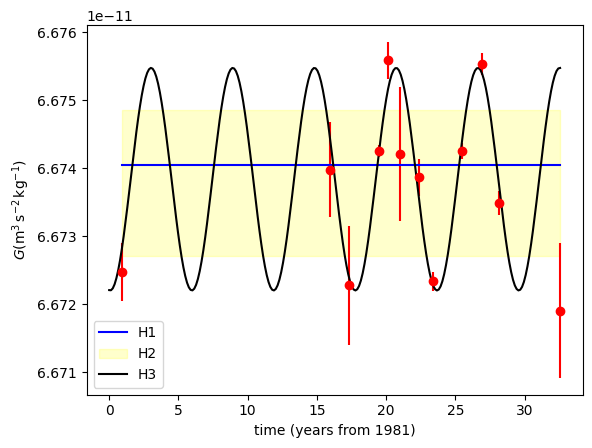

In [39]:
plt.errorbar(years, Gs, yerr=errs, fmt='ro')
plt.xlabel('time (years from 1981)')
plt.ylabel(r'$G (\mathrm{m}^3\,\mathrm{s}^{-2}\,\mathrm{kg}^{-1}$)')
plt.title(r'')
yts = np.array([np.linspace(0., years[-1], 250)])
smodel = pmodel(Abf, Pbf, phi0bf, tepochn, muGbf, yts.T)
plt.plot(years, np.ones(len(years))*theta['H1'][0], c='b', label='H1')
plt.fill_between(years, np.ones(len(years))*(theta['H2'][0]+theta['H2'][1]),
                 np.ones(len(years))*(theta['H2'][0]-theta['H2'][1]),
                 color='yellow', alpha=.2, label='H2')
plt.plot(yts.T, model_H3(theta['H3'], yts.T), c='k', label='H3')
plt.legend()
plt.show()

### **Analysis with errors in measurement times**

#### **H3 Error in t**

In [40]:
def neg_ln_likelihood_H3_2(theta, x, y, sigma_x, sigma_y):
    A, P, phi0, muG = theta
    H3 = A*np.sin(phi0 + 2.*np.pi*(x-tepochn)/P) + muG
    dy = y - H3
    dy_dx = ((2*np.pi)/P)*A*np.cos(phi0 + 2.*np.pi*(x-tepochn)/P)
    sigma_net = np.sqrt(sigma_y**2 + (dy_dx**2)*(sigma_x**2))
    return np.sum((dy**2)/(sigma_net**2))

In [41]:
def chi2_H3_2(theta, x, y, sigma_x, sigma_y):
    A, P, phi0, muG = theta
    H3 = A*np.sin(phi0 + 2.*np.pi*(x-tepochn)/P) + muG
    dy = y - H3
    dy_dx = ((2*np.pi)/P)*A*np.cos(phi0 + 2.*np.pi*(x-tepochn)/P)
    sigma_net = np.sqrt(sigma_y**2 + (dy_dx**2)*(sigma_x**2))
    return np.sum((dy**2)/(sigma_net**2))

In [42]:
theta['H3_2'] = optimize.fmin(
    neg_ln_likelihood_H3_2, 
    x0=[Abf, Pbf, 1e-3, muGbf], 
    args=(years, Gs, timeserrs, errs),
    disp=False
)

In [43]:
print("Best-fit values")
print("---------------")
print(f"A : {theta['H3_2'][0]}")
print(f"P : {theta['H3_2'][1]}")
print(f"phi0 : {theta['H3_2'][2]}")
print(f"muG : {theta['H3_2'][3]}")

Best-fit values
---------------
A : 1.6179931864514326e-14
P : 5.846966779366482
phi0 : -0.086817014592071
muG : 6.673875465607212e-11


In [44]:
dof['H3_2']  = len(years) - len(theta['H3_2'])
chi2_val['H3_2']  = chi2_H3_2(theta['H3_2'], years, Gs, timeserrs, errs)
chi2_dof_val['H3_2'] = chi2_val['H3_2'] / dof['H3_2']
chi2_prob_val['H3_2'] =  chi2_prob(chi2_val['H3_2'], dof['H3_2'])

In [45]:
print(f'χ2 / DOF : {chi2_dof_val["H3_2"]}')
print(f'P(χ2, 𝛎) : {chi2_prob_val["H3_2"]}')

χ2 / DOF : 2.177073746503377
P(χ2, 𝛎) : 0.009091879908673807


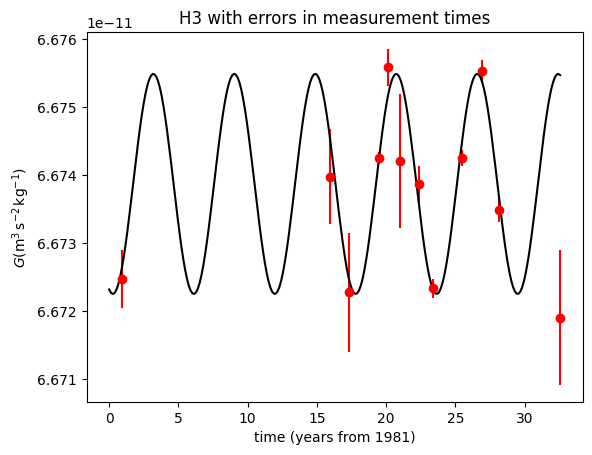

In [46]:
plt.errorbar(years, Gs, yerr=errs, fmt='ro')
plt.xlabel('time (years from 1981)')
plt.ylabel(r'$G (\mathrm{m}^3\,\mathrm{s}^{-2}\,\mathrm{kg}^{-1}$)')
plt.title(r'H3 with errors in measurement times')
yts = np.array([np.linspace(0., years[-1], 250)])
smodel = pmodel(Abf, Pbf, phi0bf, tepochn, muGbf, yts.T)
plt.plot(yts.T, model_H3(theta['H3_2'], yts.T), c='k')
plt.show()

#### **H4 Error in t**

In [47]:
def neg_ln_likelihood_H4_2(theta, x, y, sigma_x, sigma_y):
    A, P, phi0, muG, sigma_sys = theta
    H4 = A*np.sin(phi0 + 2.*np.pi*(x-tepochn)/P) + muG
    dy = y - H4
    dy_dx = ((2*np.pi)/P)*A*np.cos(phi0 + 2.*np.pi*(x-tepochn)/P)
    sigma_net = np.sqrt(sigma_y**2 + (dy_dx**2)*(sigma_x**2))
    return np.sum(np.log(sigma_net**2 + sigma_sys**2)) + np.sum((dy**2)/(sigma_net**2 + sigma_sys**2))

In [48]:
def chi2_H4_2(theta, x, y, sigma_x, sigma_y):
    A, P, phi0, muG, sigma_sys = theta
    H4 = A*np.sin(phi0 + 2.*np.pi*(x-tepochn)/P) + muG
    dy = y - H4
    dy_dx = ((2*np.pi)/P)*A*np.cos(phi0 + 2.*np.pi*(x-tepochn)/P)
    sigma_net = np.sqrt(sigma_y**2 + (dy_dx**2)*(sigma_x**2))
    return np.sum((dy**2)/(sigma_net**2 + sigma_sys**2))

In [49]:
theta['H4_2'] = optimize.fmin(
    neg_ln_likelihood_H4_2, 
    x0=[Abf, Pbf, phi0bf, muGbf, 1e-4], 
    args=(years, Gs, timeserrs, errs),
    disp=False
)

In [50]:
print("Best-fit values")
print("---------------")
print(f"A : {theta['H4_2'][0]}")
print(f"P : {theta['H4_2'][1]}")
print(f"phi0 : {theta['H4_2'][2]}")
print(f"muG : {theta['H4_2'][3]}")
print(f"sigma_sys : {theta['H4_2'][4]}")

Best-fit values
---------------
A : 1.9116287403708016e-14
P : 7.168563684820687
phi0 : 0.0014204868444382492
muG : 6.571524732631886e-11
sigma_sys : 1.0191635473093437e-12


In [51]:
dof['H4_2']  = len(years) - len(theta['H4_2'])
chi2_val['H4_2']  = chi2_H4_2(theta['H4_2'], years, Gs, timeserrs, errs)
chi2_dof_val['H4_2'] = chi2_val['H4_2'] / dof['H4_2']
chi2_prob_val['H4_2'] =  chi2_prob(chi2_val['H4_2'], dof['H4_2'])

In [52]:
print(f'χ2 / DOF : {chi2_dof_val["H4_2"]}')
print(f'P(χ2, 𝛎) : {chi2_prob_val["H4_2"]}')

χ2 / DOF : 1.7182051994501282
P(χ2, 𝛎) : 0.032623221884681176
